# Import Data

In [1]:
import pandas as pd

In [2]:
data_path = 'mathorcup_recom_listwise/data/'

In [3]:
info_df2 = pd.read_csv(data_path + 'doc_info.csv', dtype=str)
info_df2

,contentID,contentType,contentCategory
0,124564892986,video,历史/中国史
1,124564906548,video,科学/动植物与微生物
2,124564909185,video,科学/动植物与微生物
3,124564912145,video,科学/动植物与微生物
4,124564932495,video,科学/动植物与微生物
...,...,...,...
2510698,509523681,news,情感/婚姻与家庭
2510699,509523744,news,科技/互联网
2510700,509524347,news,科技/数码产品
2510701,509524365,news,国际/国际趣闻


In [4]:
test_df = pd.read_csv(data_path + 'test_data.csv', dtype=str)
test_df

,requestID,userID,date,time,sequence
0,719708291_1635480753679_2960,1439416582,20211029,12,509057416;133681226775;509178914;509178914;508...
1,679978594_1635491281923_1780,1359957188,20211029,15,508829941;133686019323;508830405;133677444707;...
2,781051348_1635478916952_3923,1562102696,20211029,11,508920410;133682604510;508823743;133679506759;...
3,1223262997_1635514428746_6191,2446525994,20211029,21,509263836;133677339412;509255912;133666460363;...
4,1210159908_1635487197871_9372,2420319816,20211029,13,509051208;133686479202;509321576;133685566011;...
...,...,...,...,...,...
99995,1103019431_1635488217052_1566,2206038862,20211029,14,508202927;133667442521;508448933;507727992;133...
99996,819379240_1635440341187_834,1638758480,20211029,00,133680499794;133686284672;133680414545;5089725...
99997,725125338_1635454468857_6210,1450250676,20211029,04,509051208;133664849798;133686913039;508948985;...
99998,1220982835_1635495707014_791,2441965670,20211029,16,133684769217;507767581;507912030;133684439797;...


In [5]:
train_df = pd.read_csv(data_path + 'train_data.csv', dtype=str)
train_df

,userID,requestID,date,time,sequence
0,1000014754,500007377_1635422685108_3822,20211028,20,133669542676:1:148;133658378700:1:16;133650937...
1,1000019906,500009953_1635375063077_3893,20211028,06,133679233276:0:0;133658338671:0:0;133677846615...
2,1000019906,500009953_1635430638501_3959,20211028,22,508420199:0:0;133669581685:1:19;508486431:1:23...
3,1000019906,500009953_1635431257521_6241,20211028,22,133686693807:0:0;508214895:0:0;133685336335:0:...
4,1000024368,500012184_1634998901528_248,20211023,22,133665269544:0:0;133676553526:0:0;507174630:0:...
...,...,...,...,...,...
31298935,999971832,499985916_1635167173635_2208,20211025,21,133680478319:0:0;507555242:0:0;507263285:0:0;1...
31298936,999971832,499985916_1635167307558_3991,20211025,21,133680491898:0:0;507551799:0:0;507462062:0:0;1...
31298937,999971832,499985916_1635167608753_1058,20211025,21,133680391836:0:0;507360402:0:0;507163538:0:0;1...
31298938,999971832,499985916_1635336680046_4362,20211027,20,133680418438:0:0;507155934:0:0;507416869:0:0;1...


# Compare train_data and test_data

In [6]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
print('train:', train_df.columns)
print('test:', test_df.columns)

train: Index(['userID', 'requestID', 'date', 'time', 'sequence'], dtype='object')
test: Index(['requestID', 'userID', 'date', 'time', 'sequence'], dtype='object')


## User ID

In [8]:
train_userID = set(train_df.loc[:, 'userID'])
test_userID = set(test_df.loc[:, 'userID'])
userID_intersection = train_userID.intersection(test_userID)

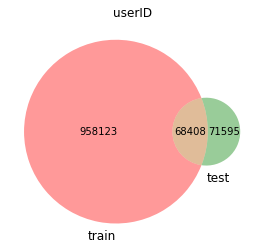

In [9]:
title = 'userID'
venn2(
    subsets=(len(train_userID), len(test_userID), len(userID_intersection)),
    set_labels=('train', 'test'),
)
plt.title(title)
plt.savefig('images/{}.png'.format(title))

## Request ID

In [10]:
train_requestID = set(train_df.loc[:, 'requestID'])
test_requestID = set(test_df.loc[:, 'requestID'])
requestID_intersection = train_requestID.intersection(test_requestID)

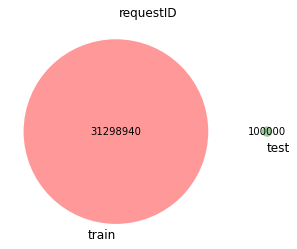

In [11]:
title = 'requestID'
venn2(
    subsets=(len(train_requestID), len(test_requestID), len(requestID_intersection)),
    set_labels=('train', 'test'),
)
plt.title(title)
plt.savefig('images/{}.png'.format(title))

## Date

In [12]:
train_date = train_df['date'].value_counts().sort_index()
train_date

20211021     125012
20211022    4158197
20211023    4313769
20211024    4495900
20211025    4605974
20211026    4699681
20211027    4529496
20211028    4370911
Name: date, dtype: int64

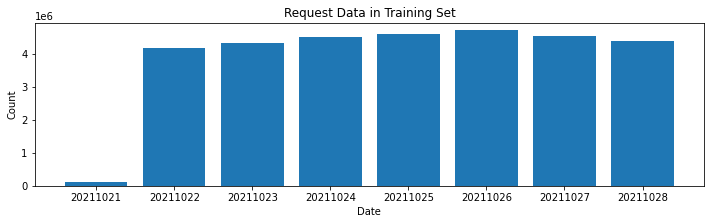

In [21]:
title = 'Request Data in Training Set'
plt.bar(train_date.index, train_date)
plt.rcParams["figure.figsize"] = (15,3)
plt.title(title)
plt.xlabel('Date')
plt.ylabel('Count')
plt.savefig('images/{}.png'.format(title), bbox_inches='tight')

In [14]:
test_date = test_df['date'].value_counts().sort_index()
test_date

20211029    100000
Name: date, dtype: int64

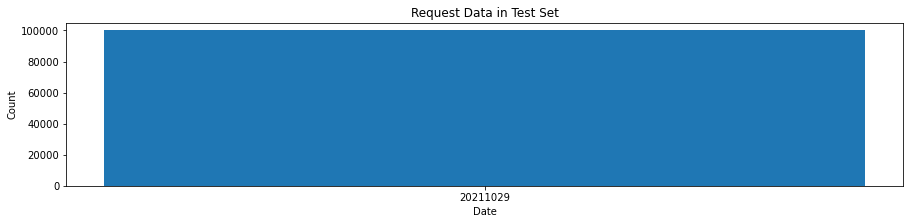

In [15]:
title = 'Request Data in Test Set'
plt.bar(test_date.index, test_date)
plt.rcParams["figure.figsize"] = (15,3)
plt.title(title)
plt.xlabel('Date')
plt.ylabel('Count')
plt.savefig('images/{}.png'.format(title), bbox_inches='tight')

## Time

In [16]:
train_time = train_df['time'].value_counts().sort_index()
train_time

00     717010
01     426161
02     313070
03     291806
04     364509
05     655412
06    1104102
07    1248129
08    1182242
09    1266917
10    1357072
11    1467415
12    1674836
13    1500176
14    1456922
15    1542613
16    1578210
17    1516693
18    1634705
19    1942759
20    2153465
21    2334581
22    2135839
23    1434296
Name: time, dtype: int64

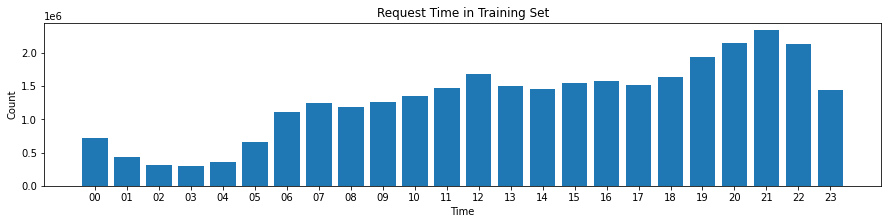

In [18]:
title = 'Request Time in Training Set'
plt.bar(train_time.index, train_time)
plt.rcParams["figure.figsize"] = (15,3)
plt.title(title)
plt.xlabel('Time')
plt.ylabel('Count')
plt.savefig('images/{}.png'.format(title), bbox_inches='tight')

In [19]:
test_time = test_df['time'].value_counts().sort_index()
test_time

00    2464
01    1484
02    1161
03     988
04    1230
05    2449
06    4160
07    4675
08    4484
09    4216
10    4515
11    5076
12    5871
13    4890
14    4825
15    4997
16    5171
17    4951
18    5008
19    6041
20    6536
21    6956
22    5695
23    2157
Name: time, dtype: int64

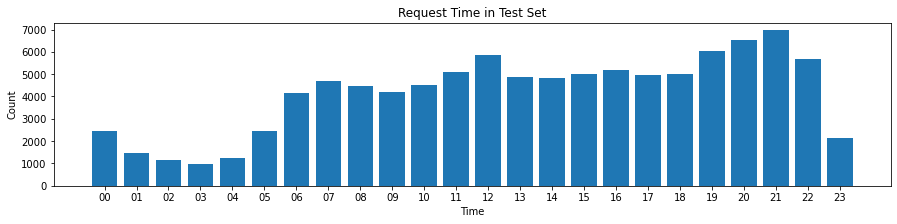

In [20]:
title = 'Request Time in Test Set'
plt.bar(test_time.index, test_time)
plt.rcParams["figure.figsize"] = (12,3)
plt.title(title)
plt.xlabel('Time')
plt.ylabel('Count')
plt.savefig('images/{}.png'.format(title), bbox_inches='tight')

## Sequence

In [48]:
import numpy as np
import pprint

In [50]:
print('test:', test_df.loc[0, 'sequence'].split(';'))

test: ['509057416', '133681226775', '509178914', '509178914', '508932788', '133683192346', '508882288', '133676939804']


In [52]:
print('train:', train_df.loc[0, 'sequence'].split(';'))

train: ['133669542676:1:148', '133658378700:1:16', '133650937891:1:85', '133663959878:1:221', '506898339:0:0', '133658512070:1:101', '133660220952:1:60', '506770575:0:0', '133673154438:1:102', '133660292493:0:0', '133660292493:1:120']


### Item ID

See if there exists new item ID in test data.

In [41]:
def icd2dict(icd):
    i, c, d = icd.split(':')
    return {'itemID': i, 'clicked': bool(eval(c)), 'duration': eval(d)}

In [42]:
class Sequence:
    def __init__(self, sequence):
        """
        :param sequence: {str}, e.g. '133679233276:0:0;133658338671:0:0;133677846615:0:0'
        :return:
        """
        self.sequence = [icd2dict(icd) for icd in sequence.split(';')]
        self.len_sequence = len(self.sequence)
        self.avg_clicked = np.mean([_['clicked'] for _ in self.sequence])
        self.avg_duration = np.mean([_['duration'] for _ in self.sequence])
    def myprint(self):
        pprint.pprint(self.sequence)
        print('length of sequence:', self.len_sequence)
        print('average clicked:', self.avg_clicked)
        print('average duration:', self.avg_duration)

In [45]:
def icd2i(icd):
    i, c, d = icd.split(':')
    return i


def seq2itemID(sequence):
    """
    :param sequence: {str}, e.g. '133679233276:0:0;133658338671:0:0;133677846615:0:0'
    :return:
    """
    return {icd2i(icd) for icd in sequence.split(';')}

In [52]:
info_df2

,contentID,contentType,contentCategory
0,124564892986,video,历史/中国史
1,124564906548,video,科学/动植物与微生物
2,124564909185,video,科学/动植物与微生物
3,124564912145,video,科学/动植物与微生物
4,124564932495,video,科学/动植物与微生物
...,...,...,...
2510698,509523681,news,情感/婚姻与家庭
2510699,509523744,news,科技/互联网
2510700,509524347,news,科技/数码产品
2510701,509524365,news,国际/国际趣闻


In [49]:
train_userID = set(train_df['userID'])
len(train_userID)

958123

In [46]:
train_itemID = set.union(*[seq2itemID(seq) for seq in train_df['sequence']])
len(train_itemID)

MemoryError: 

In [55]:
_train_df = train_df.loc[:1, :]
_train_df  # a slice of train dataframe

,userID,requestID,date,time,sequence
0,1000014754,500007377_1635422685108_3822,20211028,20,133669542676:1:148;133658378700:1:16;133650937...
1,1000019906,500009953_1635375063077_3893,20211028,06,133679233276:0:0;133658338671:0:0;133677846615...


[How to add a new column to an existing DataFrame?](https://stackoverflow.com/a/35387129/12224183)

1. `df['e'] = e.values`

2. `df1 = df1.assign(e=e.values)` (create a copy, slow for large dataframe)

In [56]:
_train_df.loc[:, 'sequenceDict'] = [Sequence(_) for _ in _train_df.sequence]
_train_df

E:\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,userID,requestID,date,time,sequence,sequenceDict
0,1000014754,500007377_1635422685108_3822,20211028,20,133669542676:1:148;133658378700:1:16;133650937...,<__main__.Sequence object at 0x0000019B0E06F430>
1,1000019906,500009953_1635375063077_3893,20211028,06,133679233276:0:0;133658338671:0:0;133677846615...,<__main__.Sequence object at 0x0000019B0E24AD60>


In [57]:
_train_df['sequence'][0]  # original sequence

'133669542676:1:148;133658378700:1:16;133650937891:1:85;133663959878:1:221;506898339:0:0;133658512070:1:101;133660220952:1:60;506770575:0:0;133673154438:1:102;133660292493:0:0;133660292493:1:120'

In [58]:
_train_df['sequenceDict'][0].myprint()  # sequence in class

[{'clicked': True, 'duration': 148, 'itemID': '133669542676'},
 {'clicked': True, 'duration': 16, 'itemID': '133658378700'},
 {'clicked': True, 'duration': 85, 'itemID': '133650937891'},
 {'clicked': True, 'duration': 221, 'itemID': '133663959878'},
 {'clicked': False, 'duration': 0, 'itemID': '506898339'},
 {'clicked': True, 'duration': 101, 'itemID': '133658512070'},
 {'clicked': True, 'duration': 60, 'itemID': '133660220952'},
 {'clicked': False, 'duration': 0, 'itemID': '506770575'},
 {'clicked': True, 'duration': 102, 'itemID': '133673154438'},
 {'clicked': False, 'duration': 0, 'itemID': '133660292493'},
 {'clicked': True, 'duration': 120, 'itemID': '133660292493'}]
length of sequence: 11
average clicked: 0.7272727272727273
average duration: 77.54545454545455


In [59]:
train_userID = set(train_df.loc[:, 'userID'])
test_userID = set(test_df.loc[:, 'userID'])
userID_intersection = train_userID.intersection(test_userID)

Text(0.5, 1.0, 'userID')

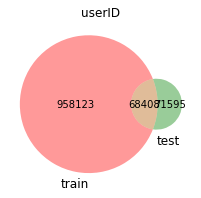

In [60]:
venn2(
    subsets=(len(train_userID), len(test_userID), len(userID_intersection)),
    set_labels=('train', 'test'),
)
plt.title('userID')